# Drug Trial


## Background

A hypothetical pharmaceutical company is wanting to run a randomized control trial in order to analyze the effectiveness of their new drug (_Somnirest_), which aims to improve sleep duration for people who get less than 6 hours of sleep a night.

The experiment consisted of 40 test subjects, and were split between those who were administered the drug, and those were administered Melatonin, a supplement that is known to be used as a sleep aid. The amount of hours of sleep each of the subject got is recorded in the table below 

| Somnirest  |Melatonin|
|------------|---------|
|         5.8|      7.1|
|         8.7|      9.2|
|         7.1|      7.8|
|         9.0|      6.1|
|         9.1|      8.2|
|         9.7|      7.9|
|        10.0|      7.8|
|         8.0|      7.0|
|        10.4|      6.1|
|         7.9|      6.1|
|         6.3|      6.2|
|         6.1|      6.1|
|         6.2|      7.4|
|         7.3|      8.8|
|         7.8|      8.1|
|         8.7|      9.1|
|         5.9|      7.1|
|         9.1|      7.2|
|         9.0|      6.8|
|         8.6|      5.9|

While looking at the table originally may provide if any insight at all, a slight advantage to Somnirest in terms of improving upon sleep, the table still doesn't provide enough insight to come to a conclusion on whether Somnirest is an optimal sleep improving supplement. 

This leads the pharmaceutical company to bring in their local data science and statistics expert to help come to a conclusion

## Imports
Importing useful packages that can help provide further insights


In [10]:
# Import statements
import matplotlib.pyplot as plt
from statistics import mean
import random
%matplotlib inline


## Data Preparation

Putting the two columns into respective lists.

In [11]:

somni = [5.8, 8.7, 7.1, 9.0, 9.1, 9.7, 10.0, 8.0, 10.4, 7.9, 
         6.3, 6.1, 6.2, 7.3, 7.8, 8.7, 5.9, 9.1, 9.0, 8.6]

mel = [7.1, 9.2, 7.8, 6.1, 8.2, 7.9, 7.8, 7.0, 6.1, 6.1, 
       6.2, 6.1, 7.4, 8.8, 8.1, 9.1, 7.1, 7.2, 6.8, 5.9]

#### First Observations

Computing the average hours of sleep of the treatment group and the control group.

In [12]:

print("Average score for treatment group:", mean(somni))
print("Average score for control group:", mean(mel))

original_diff = mean(somni) - mean(mel)
print("Difference:", original_diff)

Average score for treatment group: 8.035
Average score for control group: 7.3
Difference: 0.7350000000000003



**Initial conclusion**: The average sleep of the subjects that were administered Somnirest is higher than that of Melatonin, indicating that it is more slightly more effective at a first glance than melatonin


## Visualization

Using a histogram to gain more insights

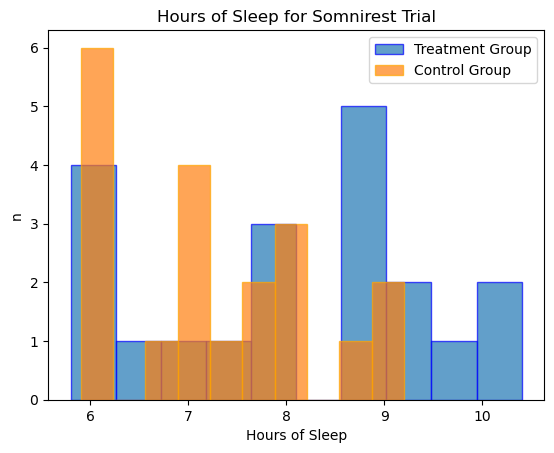

In [13]:

plt.hist(somni, label="Treatment Group", alpha=0.7, edgecolor="blue")
plt.hist(mel, label="Control Group", alpha=0.7, edgecolor="orange")
plt.title("Hours of Sleep for Somnirest Trial")
plt.ylabel("n")
plt.xlabel("Hours of Sleep")
plt.legend();


**Intermediate conclusion**: The histogram supports the original conclusion to some extent, that Somnirest is more effective than Melatonin as a sleep supplement. The histogram portrays a more normally distributed result for Somnirest, whereas the melatonin result shows a more left skewed result towards the 6 hours of sleep threshhold identified in the original conducting of the experiment.


## Significance Testing

Using permutation for significance testing to come to a final conclusion about the effectiveness of Somnirest. This is done by randomly shuffling the hours of asleep across both the control and treatment groups. Then by repeating the experiment N number of times, and computing the ratio between how many times the difference between the two shuffled lists is larger than the original difference gives the p-value. This p-value can be used to reject or fail to reject the claim that Somnirest is more effective than Melatonin.

Estimated p-value: 0.031


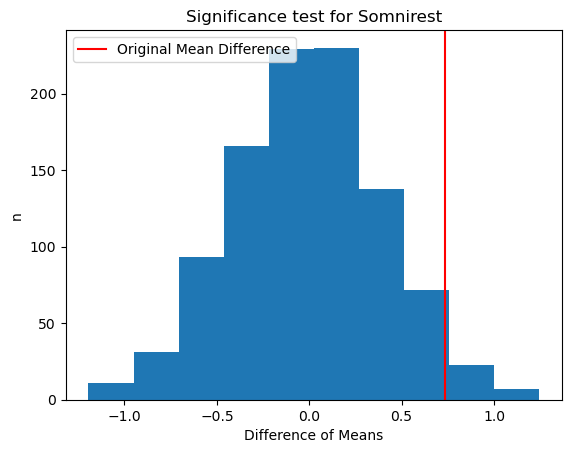

In [14]:

N_EXPERIMENTS = 1_000
significant_means = 0

mean_diffs = []
hours = [*somni, *mel] # making a list of all the hours of sleep


random.seed(123) # setting seed for repeatability

for experiment in range(N_EXPERIMENTS):
    random.shuffle(hours) # shuffling the hours
    
    test_somni = hours[:len(somni)] # reassigning to test lists
    test_mel = hours[len(mel):len(somni)+len(mel)]
    
    diff = mean(test_somni) - mean(test_mel)
    mean_diffs.append(diff)
    
    if diff >= original_diff: # determining if new difference is higher than original
        significant_means += 1

plt.hist(mean_diffs)
plt.axvline(x = original_diff, color = "red", label = "Original Mean Difference")
plt.legend(loc="upper left")
plt.title("Significance test for Somnirest")
plt.ylabel("n")
plt.xlabel("Difference of Means");

print("Estimated p-value:", significant_means / N_EXPERIMENTS)    


**Final conclusion**: Based on the result in the p-value, that Somnirest's effectiveness is significant at even the 5% level, meaning that Somnirest can be deemed as a more effective supplement for sleep than Melatonin.